In [133]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot as plt

In [69]:
# load data from file
roundabouts = pandas.read_csv("roundabout_month.csv").rename(columns={"Total": "Roundabout Crash"})
total = pandas.read_csv("total_month.csv")

In [70]:
roundabouts.head()

,Crash Year,Crash Month,Roundabout Crash
0,2016,January,5
1,2016,February,7
2,2016,March,2
3,2016,April,10
4,2016,May,22


In [126]:
# Concatenate and convert dataframes
aggr = pandas.merge(roundabouts, total, on=['Crash Year','Crash Month'], how="right").replace(',','', regex=True).fillna(0)
# Drop last "sum" row
aggr = aggr.drop(len(aggr) - 1)

aggr['Roundabout Crash'] = aggr['Roundabout Crash'].astype(int)
aggr['Intersection Crash'] = aggr['Intersection Crash'].astype(int)
aggr['Non-Intersection Crash'] = aggr['Non-Intersection Crash'].astype(int)
# aggr['Crash Year'] = aggr['Crash Year'].astype(int)
aggr['Total'] = aggr['Total'].astype(int)

aggr['Crash Month'] = aggr['Crash Month'].map({
    "January": "1",
    "February": "2",
    "March": "3",
    "April": "4",
    "May": "5",
    "June": "6",
    "July": "7",
    "August": "8",
    "September": "9",
    "October": "10",
    "November": "11",
    "December": "12"
})

In [127]:
# Make the 'Intersection Crash' filed represent all crashes IN intersections but NOT in roundabouts
aggr['Intersection Crash'] = aggr['Intersection Crash'] - aggr['Roundabout Crash']
# Convert Datetime
aggr['Crash Date'] = pandas.to_datetime(aggr['Crash Year'] + "/" + aggr['Crash Month'] + "/01")

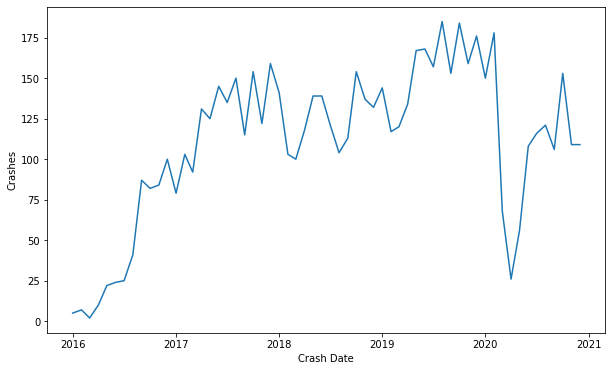

In [140]:
plt.figure(figsize=(10,6))
rc = seaborn.lineplot(data=aggr, x="Crash Date", y='Roundabout Crash')
rc.set(ylabel="Crashes")
plt.savefig('Roundabout crash by month.png')

<AxesSubplot:xlabel='Crash Date', ylabel='Intersection Crash'>

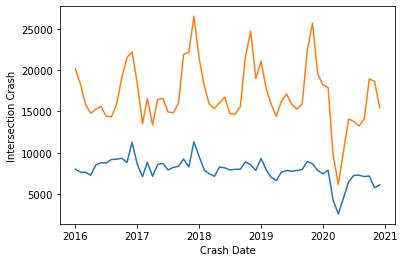

In [129]:
seaborn.lineplot(data=aggr, x="Crash Date", y='Intersection Crash')
seaborn.lineplot(data=aggr, x="Crash Date", y='Non-Intersection Crash')

<AxesSubplot:xlabel='Crash Date', ylabel='Roundabout Pct'>

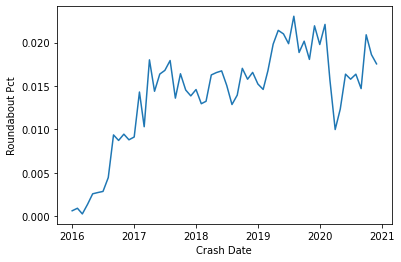

In [130]:
aggr['Roundabout Pct'] = aggr['Roundabout Crash'] / (aggr['Roundabout Crash'] + aggr['Intersection Crash'])
seaborn.lineplot(data=aggr, x="Crash Date", y='Roundabout Pct')

<AxesSubplot:xlabel='Crash Date', ylabel='Roundabout Pct'>

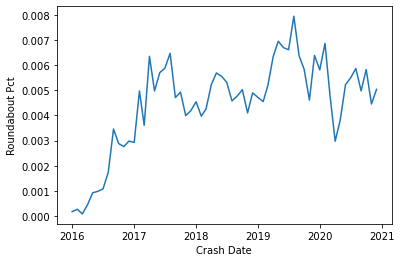

In [131]:
aggr['Roundabout Pct'] = aggr['Roundabout Crash'] / (aggr['Total'])
seaborn.lineplot(data=aggr, x="Crash Date", y='Roundabout Pct')

<AxesSubplot:xlabel='Crash Date', ylabel='Intersection Pct'>

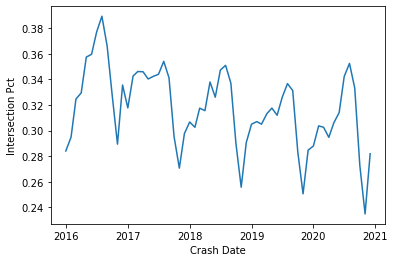

In [132]:
aggr['Intersection Pct'] = aggr['Intersection Crash'] / (aggr['Total'])
seaborn.lineplot(data=aggr, x="Crash Date", y='Intersection Pct')